In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_old = pd.read_csv('Modeling_data_new.csv')

In [3]:
df=df_old.drop('Row_Labels',axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 7 columns):
B113.2        145 non-null int64
IPMC-301.3    145 non-null int64
IPMC-302.4    145 non-null int64
IPMC-304.7    145 non-null int64
IPMC-308.1    145 non-null int64
PM-301.3      145 non-null int64
Zombie        145 non-null int64
dtypes: int64(7)
memory usage: 8.1 KB


In [5]:
df.head()

,B113.2,IPMC-301.3,IPMC-302.4,IPMC-304.7,IPMC-308.1,PM-301.3,Zombie
0,0,1,0,0,0,0,1
1,0,1,1,1,1,0,1
2,0,1,1,1,1,0,1
3,0,1,0,0,1,0,1
4,0,1,1,1,0,0,1


In [6]:
# convert target variable income to categorical
df['Zombie'] = df['Zombie'].astype('category')

# Model Building and Evaluation

In [7]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [8]:
# Putting feature variable to X
X = df.drop('Zombie',axis=1)

# Putting response variable to y
y = df['Zombie']

In [9]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,B113.2,IPMC-301.3,IPMC-302.4,IPMC-304.7,IPMC-308.1,PM-301.3
36,0,1,1,0,1,0
51,0,1,1,1,1,0
106,0,0,0,0,0,0
72,0,1,0,0,0,0
105,0,0,0,1,1,0


In [10]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       1.00      0.88      0.94        26

    accuracy                           0.93        44
   macro avg       0.93      0.94      0.93        44
weighted avg       0.94      0.93      0.93        44



In [12]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[18  0]
 [ 3 23]]
0.9318181818181818


In [13]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
 

# Putting features
features = list(df.columns[1:])
features

/Users/rahulgaur9276/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


['IPMC-301.3', 'IPMC-302.4', 'IPMC-304.7', 'IPMC-308.1', 'PM-301.3', 'Zombie']

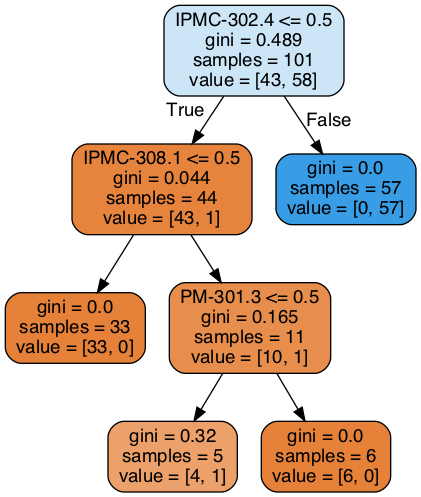

In [14]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Training the Random Forest model

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rfc = RandomForestClassifier(n_estimators=600)

In [17]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Predictions and Evaluation of Random Forest

In [18]:
predictions = rfc.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       1.00      0.88      0.94        26

    accuracy                           0.93        44
   macro avg       0.93      0.94      0.93        44
weighted avg       0.94      0.93      0.93        44

